# Fine-Tuning Your Model

## Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')

In [5]:
diabetes_df.sample(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
191,9,123,70,44,94,33.1,0.374,40,0
228,4,197,70,39,744,36.7,2.329,31,0
594,6,123,72,45,230,33.6,0.733,34,0
515,3,163,70,18,105,31.6,0.268,28,1
424,8,151,78,32,210,42.9,0.516,36,1


## How good is your model?

### Assessing a diabetes prediction classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
random_state=42)

In [8]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## Logistic regression and the ROC curve

### Building a logistic regression model

In [10]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.2947235  0.19806025 0.14438666 0.16915509 0.51156199 0.47996891
 0.01556232 0.60399639 0.53765846 0.78698535]


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### The ROC curve

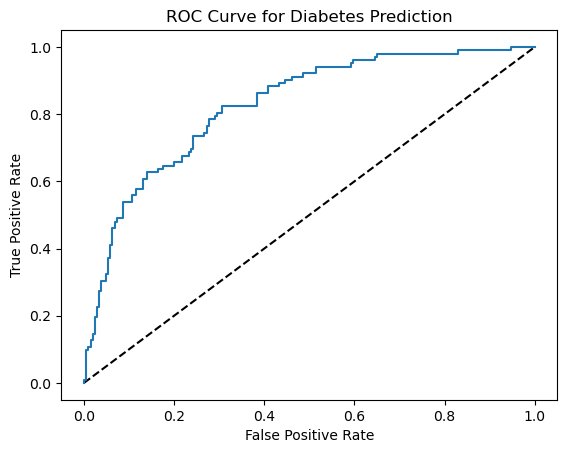

In [12]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

### ROC AUC

In [15]:
y_pred = logreg.predict(X_test)

In [16]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8260517799352751
[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



## Hyperparameter tuning

### Hyperparameter tuning with GridSearchCV

In [1]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso()

In [24]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.15790315789473686}
Tuned lasso score: 0.27250160008090485


### Hyperparameter tuning with RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.7551265306122449, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.19183673469387758}
Tuned Logistic Regression Best Accuracy Score: 0.6326086956521738


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/israel/miniconda3/envs/ds2/lib/python3.12/site-p